<a href="https://colab.research.google.com/github/DarioMangini/IUM_Progetto_Mangini_Dario/blob/main/notebook/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DarioMangini/fall-detection-yolo.git
%cd fall-detection-yolo
!ls

Cloning into 'fall-detection-yolo'...
remote: Enumerating objects: 5561, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5561 (delta 1), reused 2 (delta 0), pack-reused 5554 (from 3)
Receiving objects: 100% (5561/5561), 62.53 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/fall-detection-yolo
datasets  fall.yaml  LICENSE  notebooks  README.md  requirements.txt  src


In [2]:
import glob

labels_train = glob.glob("datasets/train/labels/*.txt")
labels_val   = glob.glob("datasets/valid/labels/*.txt")

print("Numero file label train:", len(labels_train))
print("Numero file label val:", len(labels_val))

def count_classes(label_files):
    counts = {}
    for lf in label_files:
        with open(lf, "r") as f:
            for line in f:
                if not line.strip():
                    continue
                cls = int(line.split()[0])
                counts[cls] = counts.get(cls, 0) + 1
    return counts

train_counts = count_classes(labels_train)
val_counts   = count_classes(labels_val)

print("Train class counts:", train_counts)
print("Val class counts:", val_counts)


Numero file label train: 2557
Numero file label val: 303
Train class counts: {0: 1281, 1: 1276}
Val class counts: {1: 152, 0: 151}


Image: datasets/train/images/001667_jpg.rf.24abba88646756de643b043b1be46805.jpg
Label: datasets/train/labels/001667_jpg.rf.24abba88646756de643b043b1be46805.txt


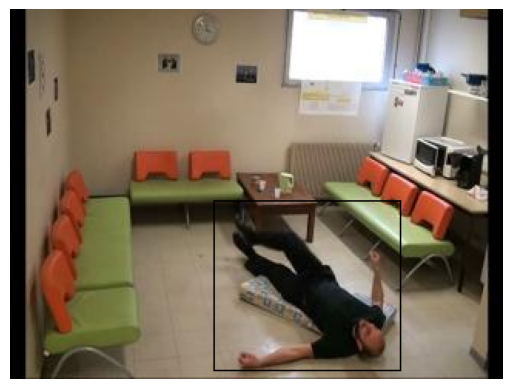

In [3]:
import cv2
import matplotlib.pyplot as plt
import random

example_img_path = random.choice(glob.glob("datasets/train/images/*"))
example_lbl_path = example_img_path.replace("/images/", "/labels/").rsplit(".", 1)[0] + ".txt"

print("Image:", example_img_path)
print("Label:", example_lbl_path)

img = cv2.imread(example_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

with open(example_lbl_path) as f:
    for line in f:
        if not line.strip():
            continue
        cls, x_center, y_center, bw, bh = map(float, line.split())
        x_center *= w
        y_center *= h
        bw *= w
        bh *= h

        x1 = int(x_center - bw/2)
        y1 = int(y_center - bh/2)
        x2 = int(x_center + bw/2)
        y2 = int(y_center + bh/2)

        cv2.rectangle(img, (x1, y1), (x2, y2), 2)

plt.imshow(img)
plt.axis("off")
plt.show()
